In [1]:
# %matplotlib qt
import pickle
import os
from pylab import *
import math

In [2]:
def loadFile(name):
    with open(name,"rb") as f:
        return pickle.load(f)

In [3]:
nodexy = loadFile('../0_map_data_processed/node_xy.p')
nodell = loadFile('../0_map_data_processed/node_ll.p')
windows = loadFile('./map_windows/windows.p')
params = loadFile('./map_windows/data.p')

In [4]:
x_offset = params['x_offset']
y_offset = params['y_offset']
x_window = params['x_window']
y_window = params['y_window']
R = 6378000

In [5]:
print('Number of windows :',len(windows))

Number of windows : 9831


In [6]:
def findFoot(x,y,x1,y1,x2,y2):
    a = y2-y1; b = x1-x2
    c = y1*(x2-x1) - x1*(y2-y1)
    temp = -(a*x+b*y+c)/(a**2+b**2)
    return temp*a+x,temp*b+y

In [7]:
lat,lon = map(float,input('').split(','))
lat = lat*(pi/180); lon = lon*(pi/180); R = 6378000
x = (R*cos(lat)*cos(lon))
y = (R*sin(lon)*cos(lat))
x_w = (int(x)-x_offset)//x_window
y_w = (int(y)-y_offset)//y_window
mn = math.inf
print('The window corresponding to given point:',x_w,y_w)

12.9802357,77.6958332
The window corresponding to given point: 67 71


In [8]:
w_codes = []
for i in range(-2,3):
    for j in range(-2,3):
        code = str(x_w+i)+'_'+str(y_w+j)
        if(code not in windows):
            continue
        w_codes.append(code)
if(len(w_codes) == 0):
    print('Invalid coordinate, enter coordinate in Bangalore')

In [9]:
%%time
mn = math.inf
add_edge = []
for code in w_codes:
    for edge in windows[code]:
        x1,y1 = nodexy[edge[0]]
        x2,y2 = nodexy[edge[1]]
        fx,fy = findFoot(x,y,x1,y1,x2,y2)
        if(fx >= min(x1,x2) and fx <= max(x1,x2)):
            dst = (x-fx)**2 + (y-fy)**2
            if(dst < mn):
                mn = dst; loc = [fx,fy]
                add_edge = edge
        dst = (x-x1)**2 + (y-y1)**2
        if(dst < mn):
            mn = dst; loc = [x1,y1]
            add_edge = edge
        dst = (x-x2)**2 + (y-y2)**2
        if(dst < mn):
            mn = dst; loc = [x2,y2]
            add_edge = edge
#         plot([-x1,-x2],[-y1,-y2],linewidth = 1)
# scatter(-x,-y,s=100)
# grid()
# show()
print('Given x,y:',x,y)
print('Location on edge:',loc)
print('The corresponding edge:',add_edge)

Given x,y: 1324431.1694563064 6072268.146406488
Location on edge: [1324430.9845873585, 6072265.862172635]
The corresponding edge: ('4668341914', '4668341915', 46.977565957222254)
Wall time: 22.9 ms


Example of SRIB Bangalore

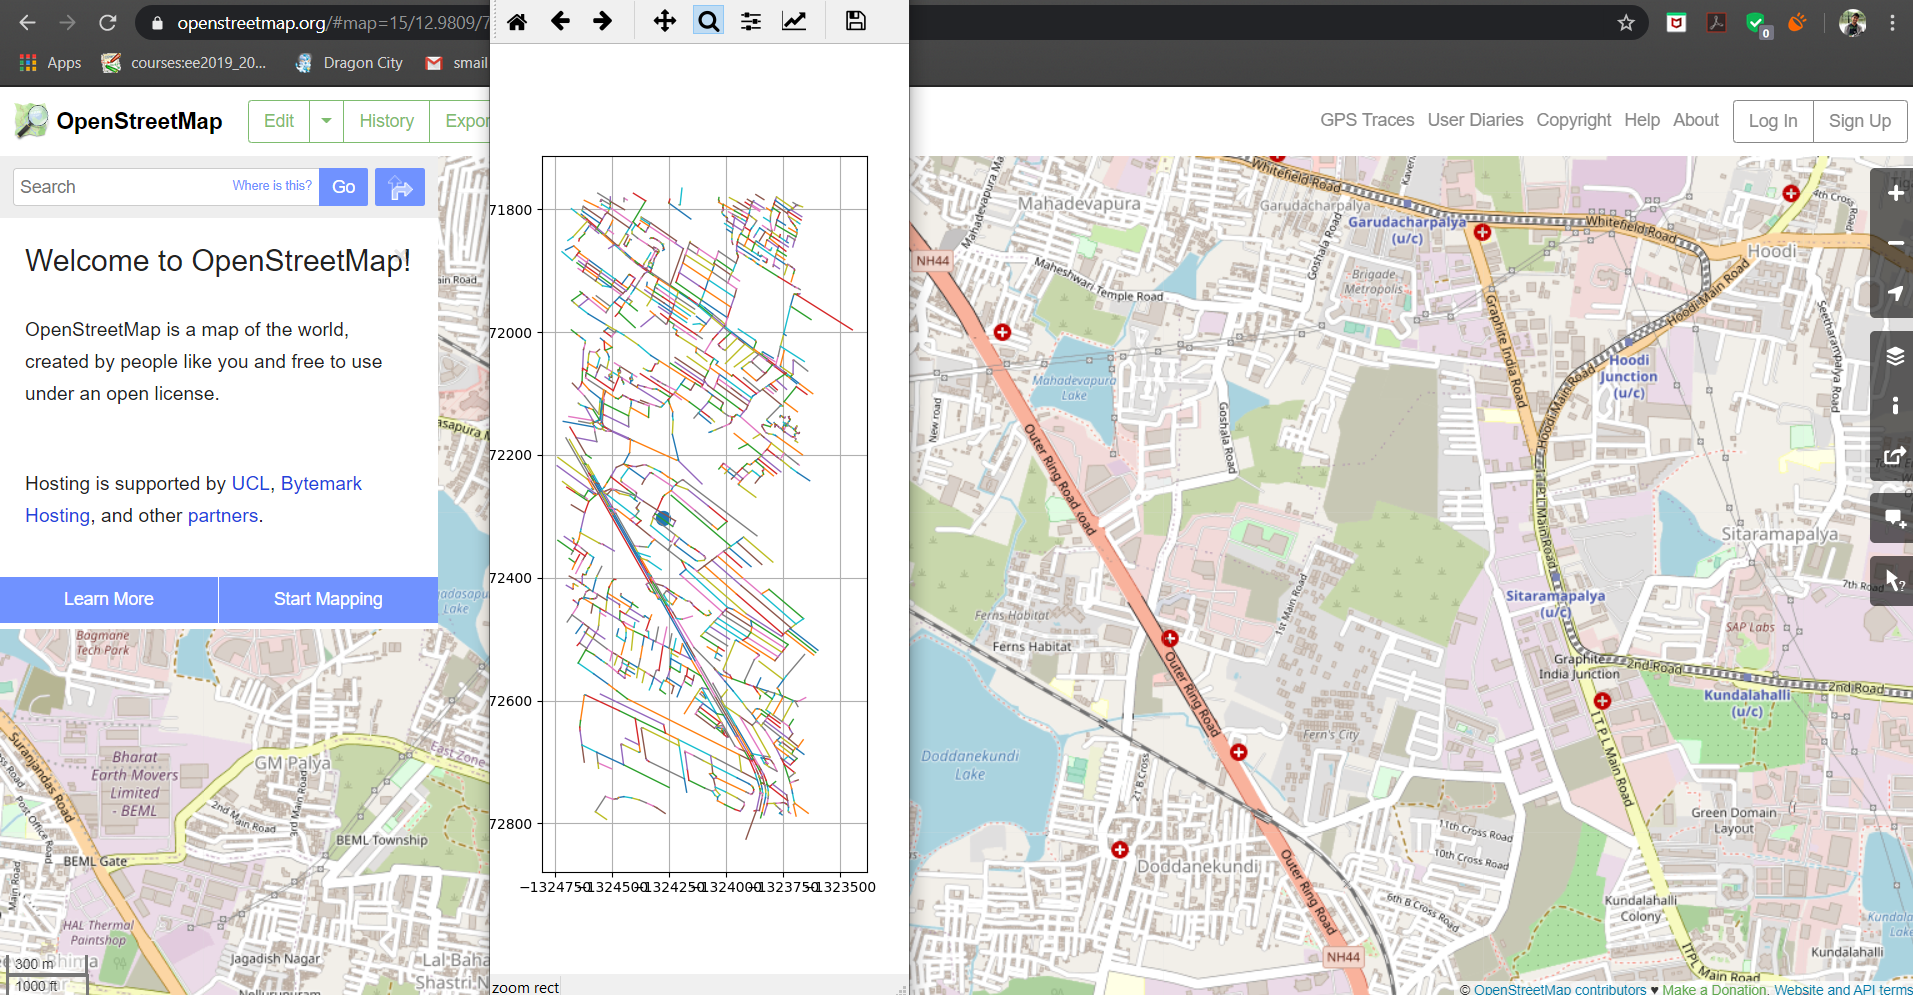